In [174]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [183]:
class Reader:
    def __init__(self, file, cols, data_cols):
        lexems = [set() for i in range(len(cols))]
        f = open(file, 'r')
        for line in f:
            tokens = line.split(',')
            for i, c in enumerate(cols):
                if tokens[i] not in lexems[i]:
                    lexems[i].add(tokens[i])
        self.list_lexems = [sorted(list(l)) for l in lexems]
        self.dict_lexems = [{x:i for i,x in enumerate(l)} for l in self.list_lexems]
        self.dims = [len(d) for d in self.list_lexems]
        self.muls = [1 for i in range(len(self.dims))]
        for i in range(len(self.dims)-2,-1,-1):
            self.muls[i] = self.muls[i+1]*self.dims[i+1]
        self.count = np.prod(self.dims)
        self.data = [[] for i in range(self.count)]
        f.seek(0)
        for line in f:
            tokens = line.split(',')
            dat = []
            lexems = []
            for c in cols:
                lexems.append(tokens[c])
            for c in data_cols:
                if tokens[c].lower() == "true" or tokens[c].lower() == "false":
                    dat.append(int(tokens[c].lower() == "true"))
                else:
                    dat.append(float(tokens[c]))
            self.append(lexems, dat)
        f.close()
    def append(self, lexems, dat):
        index = 0
        for i, l in enumerate(lexems):
            local_index = self.dict_lexems[i][l]
            index += self.muls[i] * local_index
        self.data[index].append(dat)
    def reduce(self, index):
        means = np.zeros(tuple(self.dims))
        stds = np.zeros(tuple(self.dims))
        for i in range(self.count):
            index = [0 for j in range(len(self.dims))]
            cur = i
            for j in range(len(self.dims)):
                index[j] = cur // self.muls[j]
                cur %= self.muls[j]
            means[tuple(index)] = np.mean(self.data[i])
            stds[tuple(index)] = np.std(self.data[i])
        return means, stds
    
def graph_hardness(reader, rho_index):
    mpl.rcParams['figure.dpi'] = 100
    means, stds = reader.reduce(0)
    X = [float(x) for x in reader.list_lexems[2]]
    mean1, mean2 = means[:,rho_index,:]
    std1, std2 = stds[:,rho_index,:]
    plt.errorbar(X, mean1, yerr=std1, label="ssds", capsize=5)
    plt.errorbar(X, mean2, yerr=std2, label="tpch", capsize=5)
    plt.ylabel("Hardness", fontsize=15)
    plt.xlabel("Adversity", fontsize=15)
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)
    plt.grid()
    plt.legend()
    plt.ylim(-5,40)
    plt.title("Bound probability: " + str(reader.list_lexems[1][rho_index]))

In [184]:
reader = Reader('hardness.csv', [0,1,2], [3])

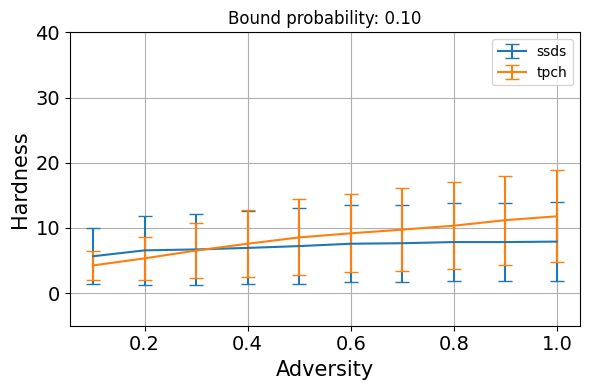

In [185]:
graph_hardness(reader, 0)

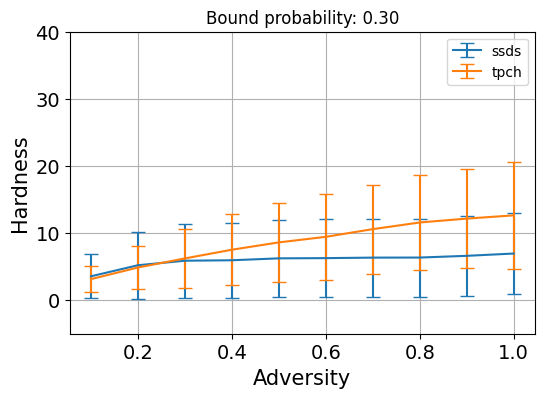

In [179]:
graph_hardness(reader, 1)

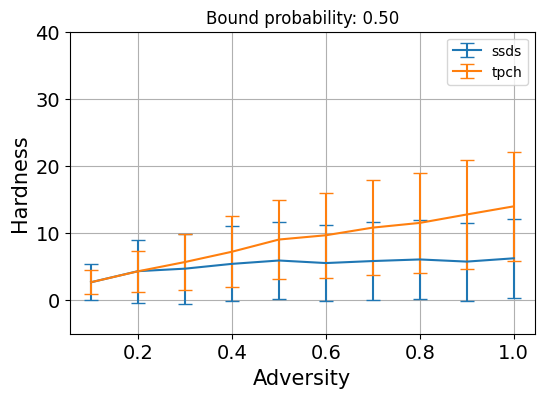

In [180]:
graph_hardness(reader, 2)

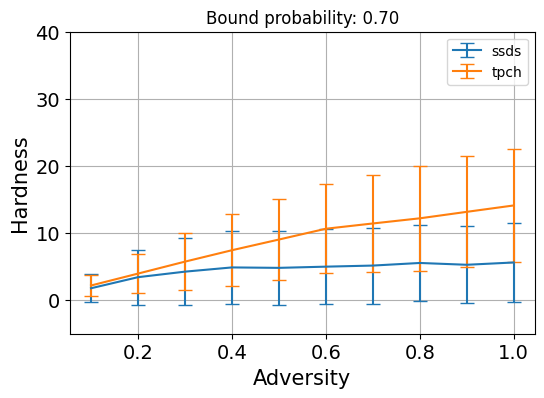

In [181]:
graph_hardness(reader, 3)

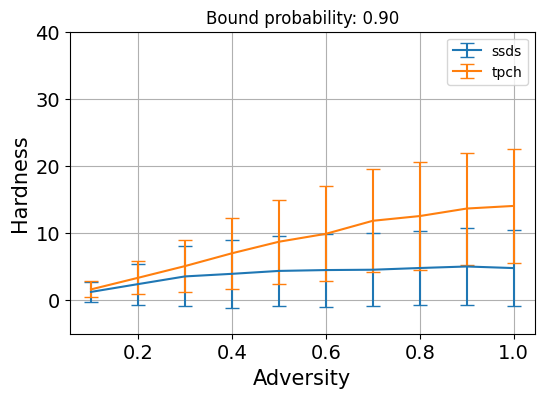

In [182]:
graph_hardness(reader, 4)